In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import importlib

In [2]:
data = np.load("Data_NSGA2_ArNeg.npz", allow_pickle=True)

all_F       = data["all_F"]        # shape: (n_pop, n_gen) — each entry is a Pareto front
popsize_list = data["popsize_list"]  # shape: (n_pop,)
gens_list    = data["gens_list"]     # shape: (n_gen,)

all_time = data["all_time"]

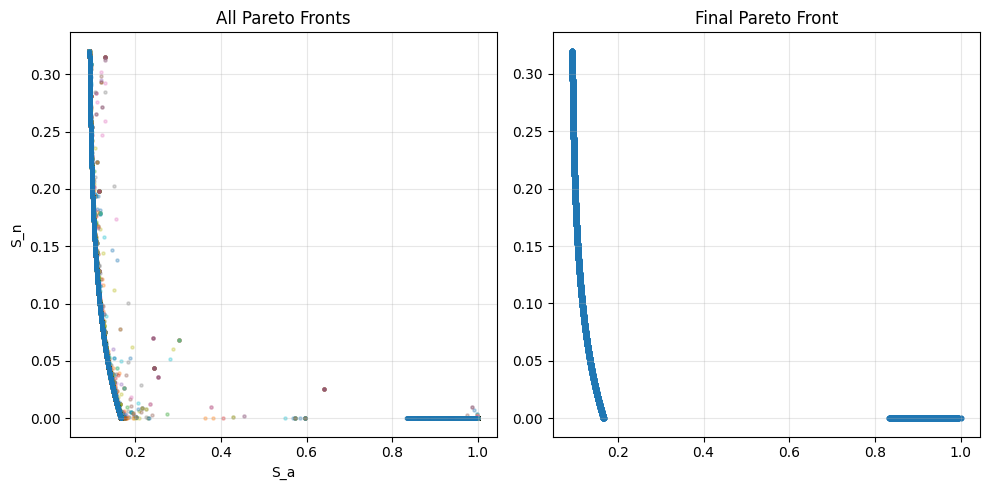

In [3]:
n_pop = len(popsize_list)
n_gen = len(gens_list)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# -------------------------
# LEFT SUBPLOT — All Fronts
# -------------------------
ax_left = axes[0]

for i in range(n_pop):        # loop over population sizes
    for j in range(n_gen):    # loop over generations
        F = all_F[i, j]       # shape (N_points, 2)
        ax_left.scatter(F[:, 0], F[:, 1], s=5, alpha=0.3)

ax_left.set_title("All Pareto Fronts")
ax_left.set_xlabel("S_a")
ax_left.set_ylabel("S_n")
ax_left.grid(alpha=0.3)

# -------------------------
# RIGHT SUBPLOT — Final Front
# -------------------------
ax_right = axes[1]

pf_final = all_F[-1, -1]     # last population size & last generation

ax_right.scatter(pf_final[:, 0], pf_final[:, 1], s=10)
ax_right.set_title("Final Pareto Front")
ax_left.set_xlabel("S_a")
ax_left.set_ylabel("S_n")
ax_right.grid(alpha=0.3)

plt.tight_layout()
plt.show()

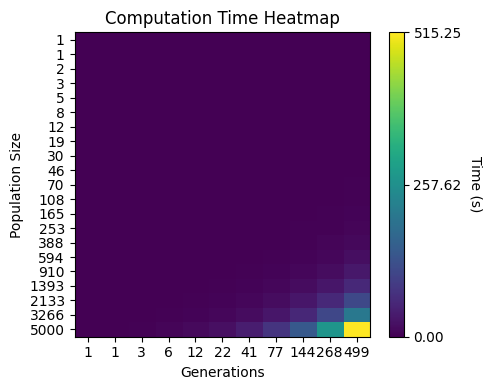

In [4]:
# Example matrix
data = all_time   # shape (n_pop, n_gen)

vmin = np.min(data)
vmax = np.max(data)

plt.figure(figsize=(5, 4))    # <<< wider heatmap

# Heatmap
im = plt.imshow(data, cmap="viridis", vmin=vmin, vmax=vmax, aspect='auto')

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label("Time (s)", rotation=270, labelpad=15)

# Show min/mid/max on colorbar
cbar.set_ticks([vmin, (vmin+vmax)/2, vmax])
cbar.set_ticklabels([f"{vmin:.2f}", f"{(vmin+vmax)/2:.2f}", f"{vmax:.2f}"])

# Axis labels & ticks
plt.xlabel("Generations")
plt.ylabel("Population Size")

plt.xticks(np.arange(len(gens_list)), gens_list)
plt.yticks(np.arange(len(popsize_list)), popsize_list)

plt.title("Computation Time Heatmap")

plt.tight_layout()
plt.show()